# 라이브러리 로드

In [22]:
# 구글 드라이브 연결(데이터 로드를 위해서)
from google.colab import drive

drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


## 데이터 분석용 라이브러리

In [23]:
# 데이터 분석에 사용할 라이브러리
import pandas as pd
import numpy as np

In [24]:
import logging

logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

## 데이터 시각화용 라이브러리

In [25]:
# 코렙 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,553 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123595 files and dire

In [26]:
# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# 데이터 로드
- [타이타닉 데이터 로드](https://www.kaggle.com/c/titanic/)

In [35]:
DATA_PATH = "/content/data/MyDrive/AI_study/1. Machine Learning/data/"

df = pd.read_csv(DATA_PATH+"Titanic.csv")

In [36]:
df.shape, df.columns

((891, 12),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [37]:
df.columns = [col.lower() for col in df.columns] # 컬럼명 소문자로 변환
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [38]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
df.isnull().sum().sort_values(ascending=False)

,0
cabin,687
age,177
embarked,2
passengerid,0
survived,0
pclass,0
name,0
sex,0
sibsp,0
parch,0


In [40]:
df['cabin'] = df.cabin.fillna("unknown")

df.head(20)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,unknown,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,unknown,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,unknown,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,unknown,C


In [42]:
print(df['embarked'].unique())
df.embarked.value_counts()

['S' 'C' 'Q' nan]


,count
embarked,
S,644
C,168
Q,77


In [43]:
df['embarked'] = df.embarked.fillna("S")

In [44]:
df.head(20)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,unknown,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,unknown,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,unknown,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,unknown,C


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        891 non-null    object 
 11  embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
df.drop('passengerid', axis=1, inplace=True)

In [48]:
df['sex'] = df['sex'].apply(lambda x: 0 if x == 'female' else 1)
df.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,unknown,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,unknown,S
5,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,unknown,Q
6,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,unknown,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,unknown,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,unknown,C


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    int64  
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     891 non-null    object 
 10  embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [51]:
df['age_random'] = df['age']

# random sampling
random_sampling = (df['age'].dropna().sample(df['age'].isnull().sum()))
random_sampling.index = df[lambda x: x['age'].isnull()].index # index 부여

# NA imputation
df.loc[df['age'].isnull(), 'age_random'] = random_sampling

# 확인
df[['age', 'age_random']].isnull().sum()

,0
age,177
age_random,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   name        891 non-null    object 
 3   sex         891 non-null    int64  
 4   age         714 non-null    float64
 5   sibsp       891 non-null    int64  
 6   parch       891 non-null    int64  
 7   ticket      891 non-null    object 
 8   fare        891 non-null    float64
 9   cabin       891 non-null    object 
 10  embarked    891 non-null    object 
 11  age_random  891 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


In [56]:
df['sex'].astype('category')
df['sibsp'].astype('category')
df['parch'].astype('category')
df['cabin'].astype('category')
df['embarked'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   name        891 non-null    object 
 3   sex         891 non-null    int64  
 4   age         714 non-null    float64
 5   sibsp       891 non-null    int64  
 6   parch       891 non-null    int64  
 7   ticket      891 non-null    object 
 8   fare        891 non-null    float64
 9   cabin       891 non-null    object 
 10  embarked    891 non-null    object 
 11  age_random  891 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


In [ ]:
df['age'].astype('category')
df['age'].astype('int8')
df['sibsp'].astype('category')
df['parch'].astype('category')
df['cabin'].astype('category')
df['embarked'].astype('category')

In [45]:
df_object=df.select_dtypes(include='object')
df_object.columns

Index(['name', 'sex', 'ticket', 'cabin', 'embarked'], dtype='object')

In [61]:
df_object.columns

Index(['name', 'sex', 'ticket', 'cabin', 'embarked'], dtype='object')

In [62]:
df_pivot = pd.pivot_table(df,                # 피벗할 데이터프레임
                     index = ['sex', 'parch'],    # 행 위치에 들어갈 열
                     columns = 'pclass',    # 열 위치에 들어갈 열
                     values = 'survived',     # 데이터로 사용할 열
                     aggfunc = 'sum')   # 데이터 집계함수

df_pivot

pclass        1     2     3
sex parch                  
0   0      63.0  40.0  50.0
    1      17.0  17.0  12.0
    2      11.0  11.0   8.0
    3       NaN   2.0   1.0
    4       NaN   NaN   0.0
    5       NaN   NaN   1.0
    6       NaN   NaN   0.0
1   0      36.0   8.0  36.0
    1       4.0   7.0   8.0
    2       5.0   2.0   3.0
    3       NaN   NaN   0.0
    4       0.0   NaN   0.0
    5       NaN   NaN   0.0

In [11]:
df_sort = df.sort_values(by='survived', ascending=False)
print(df_sort)

     survived  pclass                                               name  \
445         1       1                          Dodge, Master. Washington   
319         1       1  Spedden, Mrs. Frederic Oakley (Margaretta Corn...   
334         1       1  Frauenthal, Mrs. Henry William (Clara Heinshei...   
330         1       3                                 McCoy, Miss. Agnes   
329         1       1                       Hippach, Miss. Jean Gertrude   
..        ...     ...                                                ...   
365         0       3                     Adahl, Mr. Mauritz Nils Martin   
371         0       3                          Wiklund, Mr. Jakob Alfred   
372         0       3                         Beavan, Mr. William Thomas   
373         0       1                                Ringhini, Mr. Sante   
890         0       3                                Dooley, Mr. Patrick   

        sex   age  sibsp  parch    ticket      fare cabin embarked  
445    male   4.0 

In [12]:
survived_0_df = df[df['survived'] == 0]
survived_1_df = df[df['survived'] == 1]

In [14]:
survived_0_df.reset_index(drop=True, inplace=True)
survived_1_df.reset_index(drop=True, inplace=True)

In [15]:
survived_0_df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
2,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
3,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
4,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


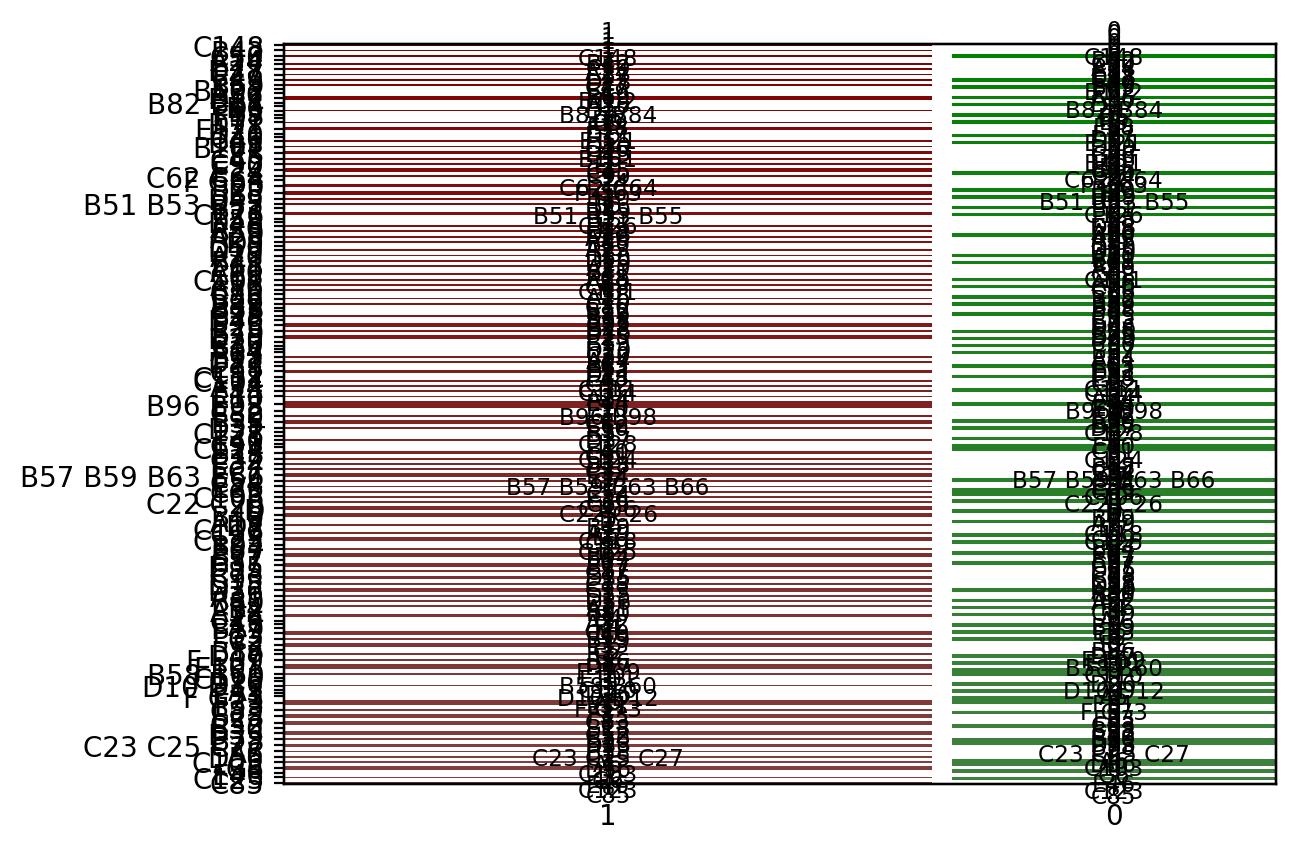

In [17]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(df, ['survived', 'cabin'],gap=0.02)
plt.show()

## 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
SEED = 42

X_tr, X_te = train_test_split(df, random_state=SEED, test_size = 0.2)
X_tr = X_tr.reset_index(drop=True)
X_te = X_te.reset_index(drop=True)

X_tr.shape, X_te.shape

((712, 12), (179, 12))

In [ ]:
X_tr.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
1,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
2,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
3,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


In [ ]:
X_tr.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [ ]:
new_survived = pd.Categorical(X_tr['survived'])
new_survived = new_survived.rename_categories(["Died","Survived"])
print(new_survived[:5])
new_survived.describe()

['Died', 'Died', 'Died', 'Died', 'Died']
Categories (2, object): ['Died', 'Survived']


,counts,freqs
categories,,
Died,444,0.623596
Survived,268,0.376404


## 데이터 확인

In [ ]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  712 non-null    int64  
 1   survived     712 non-null    int64  
 2   pclass       712 non-null    int64  
 3   name         712 non-null    object 
 4   sex          712 non-null    object 
 5   age          572 non-null    float64
 6   sibsp        712 non-null    int64  
 7   parch        712 non-null    int64  
 8   ticket       712 non-null    object 
 9   fare         712 non-null    float64
 10  cabin        159 non-null    object 
 11  embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.9+ KB


In [ ]:
X_tr.describe(include="all")

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,712.000000,712.000000,712.000000,712,712,572.000000,712.000000,712.000000,712,712.000000,159,710
unique,NaN,NaN,NaN,712,2,NaN,NaN,NaN,558,NaN,117,3
top,NaN,NaN,NaN,"Partner, Mr. Austen",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,467,NaN,NaN,NaN,7,NaN,4,525
mean,448.234551,0.376404,2.330056,NaN,NaN,29.498846,0.553371,0.379213,NaN,32.586276,NaN,NaN
std,256.731423,0.484824,0.824584,NaN,NaN,14.500059,1.176404,0.791669,NaN,51.969529,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,224.750000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.925000,NaN,NaN
50%,453.500000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,673.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,30.500000,NaN,NaN


In [ ]:
X_tr.describe(include=np.number)

,passengerid,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,448.234551,0.376404,2.330056,29.498846,0.553371,0.379213,32.586276
std,256.731423,0.484824,0.824584,14.500059,1.176404,0.791669,51.969529
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,453.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,673.500000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
X_tr.describe(exclude=np.number)

,name,sex,ticket,cabin,embarked
count,712,712,712,159,710
unique,712,2,558,117,3
top,"Partner, Mr. Austen",male,CA. 2343,C23 C25 C27,S
freq,1,467,7,4,525


In [ ]:
X_tr.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
1,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
2,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
3,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


In [ ]:
X_tr.tail()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
707,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
708,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
709,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S
710,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S
711,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S


## 타겟 데이터 확인

In [ ]:
new_survived = pd.Categorical(X_tr["survived"])
new_survived = new_survived.rename_categories(["Died","Survived"])

new_survived.describe()

,counts,freqs
categories,,
Died,444,0.623596
Survived,268,0.376404


# Data Cleaning

## 필요없는 데이터

In [ ]:
X_tr['passengerid'].nunique(), X_tr.shape[0]

(712, 712)

In [ ]:
# passengerid는 전체 데이터가 unique하기 때문에 삭제
X_tr.drop('passengerid', axis=1, inplace=True)
X_te.drop('passengerid', axis=1, inplace=True)

X_tr.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

### 결측치 처리

In [ ]:
(X_tr.isnull().sum() / X_tr.shape[0]).round(4).sort_values(ascending=False) # 각 걸럼별 결측치 비율

,0
cabin,0.7767
age,0.1966
embarked,0.0028
survived,0.0000
pclass,0.0000
name,0.0000
sex,0.0000
sibsp,0.0000
parch,0.0000
ticket,0.0000


In [ ]:
print(f'before: {X_tr.shape} / isnull().sum(): {X_tr.isnull().sum().sum()}')
# 결측치가 있는 행 제거 : X_tr.dropna(axis=0)
X_tr = X_tr.drop('cabin', axis=1)
X_te = X_te.drop('cabin', axis=1)
print(f'after: {X_tr.shape} / isnull().sum(): {X_tr.isnull().sum().sum()}')

before: (712, 11) / isnull().sum(): 695
after: (712, 10) / isnull().sum(): 142


In [ ]:
X_tr['age'] = X_tr['age'].fillna(X_tr['age'].median())
X_te['age'] = X_te['age'].fillna(X_tr['age'].median())

In [ ]:
embarked_mode = X_tr['embarked'].mode().values[0]

X_tr['embarked'] = X_tr['embarked'].fillna(embarked_mode)
X_te['embarked'] = X_te['embarked'].fillna(embarked_mode)

In [ ]:
X_tr.isnull().sum().sum(), X_te.isnull().sum().sum()

(0, 0)

# Feature Extraction
> 기존 Feature에 기반하여 새로운 Feature들을 생성

## 데이터 타입

In [ ]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   name      712 non-null    object 
 3   sex       712 non-null    object 
 4   age       712 non-null    float64
 5   sibsp     712 non-null    int64  
 6   parch     712 non-null    int64  
 7   ticket    712 non-null    object 
 8   fare      712 non-null    float64
 9   embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 55.8+ KB


#### 수치형 데이터 타입 변환

In [ ]:
df_number = X_tr.select_dtypes(include=np.number)
df_number.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [ ]:
df_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   age       712 non-null    float64
 3   sibsp     712 non-null    int64  
 4   parch     712 non-null    int64  
 5   fare      712 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 33.5 KB


In [ ]:
df_number.head()

,survived,pclass,age,sibsp,parch,fare
0,0,1,45.5,0,0,28.5000
1,0,2,23.0,0,0,13.0000
2,0,3,32.0,0,0,7.9250
3,0,3,26.0,1,0,7.8542
4,0,3,6.0,4,2,31.2750


In [ ]:
# survived
X_tr["survived"] = X_tr["survived"].astype("int32")
X_te["survived"] = X_te["survived"].astype("int32")

In [ ]:
# pclass
X_tr['pclass'].unique()

array([1, 2, 3])

In [ ]:
X_tr["pclass"] = X_tr["pclass"].astype("category")
X_te["pclass"] = X_te["pclass"].astype("category")

In [ ]:
# age
X_tr["age"] = X_tr["age"].astype("int32")
X_te["age"] = X_te["age"].astype("int32")

In [ ]:
# sibsp
X_tr['sibsp'].unique()

array([0, 1, 4, 3, 2, 8, 5])

In [ ]:
X_tr["sibsp"] = X_tr["sibsp"].astype("category")
X_te["sibsp"] = X_te["sibsp"].astype("category")

In [ ]:
# parch
X_tr['parch'].unique()

array([0, 2, 1, 6, 4, 3, 5])

In [ ]:
X_tr["parch"] = X_tr["parch"].astype("category")
X_te["parch"] = X_te["parch"].astype("category")

In [ ]:
# fare
X_tr["fare"] = X_tr["fare"].astype("float32")
X_te["fare"] = X_te["fare"].astype("float32")

In [ ]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  712 non-null    int32   
 1   pclass    712 non-null    category
 2   name      712 non-null    object  
 3   sex       712 non-null    object  
 4   age       712 non-null    int32   
 5   sibsp     712 non-null    category
 6   parch     712 non-null    category
 7   ticket    712 non-null    object  
 8   fare      712 non-null    float32 
 9   embarked  712 non-null    object  
dtypes: category(3), float32(1), int32(2), object(4)
memory usage: 33.6+ KB


#### 범주형 데이터 타입 변환

In [ ]:
df_object = X_tr.select_dtypes(include='object')
df_object.columns

Index(['name', 'sex', 'ticket', 'embarked'], dtype='object')

In [ ]:
df_object.head()

,name,sex,ticket,embarked
0,"Partner, Mr. Austen",male,113043,S
1,"Berriman, Mr. William John",male,28425,S
2,"Tikkanen, Mr. Juho",male,STON/O 2. 3101293,S
3,"Hansen, Mr. Henrik Juul",male,350025,S
4,"Andersson, Miss. Ebba Iris Alfrida",female,347082,S


In [ ]:
X_tr["sex"] = X_tr["sex"].astype("category")
X_te["sex"] = X_te["sex"].astype("category")

In [ ]:
X_tr["embarked"] = X_tr["embarked"].astype("category")
X_te["embarked"] = X_te["embarked"].astype("category")

In [ ]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  712 non-null    int32   
 1   pclass    712 non-null    category
 2   name      712 non-null    object  
 3   sex       712 non-null    category
 4   age       712 non-null    int32   
 5   sibsp     712 non-null    category
 6   parch     712 non-null    category
 7   ticket    712 non-null    object  
 8   fare      712 non-null    float32 
 9   embarked  712 non-null    category
dtypes: category(5), float32(1), int32(2), object(2)
memory usage: 24.1+ KB


In [ ]:
X_tr.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S
3,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,S
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S


## 문자열

In [ ]:
df_object = X_tr.select_dtypes(include='object')
df_object.columns

Index(['name', 'ticket'], dtype='object')

In [ ]:
df_object.head()

,name,ticket
0,"Partner, Mr. Austen",113043
1,"Berriman, Mr. William John",28425
2,"Tikkanen, Mr. Juho",STON/O 2. 3101293
3,"Hansen, Mr. Henrik Juul",350025
4,"Andersson, Miss. Ebba Iris Alfrida",347082


In [ ]:
df_object.describe()

,name,ticket
count,712,712
unique,712,558
top,"Partner, Mr. Austen",CA. 2343
freq,1,7


### 공백제거
> 앞뒤 공백제거, lstrip , rstrip

In [ ]:
X_tr["name"] = X_tr["name"].map(lambda x: x.strip())
X_tr["ticket"] = X_tr["ticket"].map(lambda x: x.strip())

X_te["name"] = X_te["name"].map(lambda x: x.strip())
X_te["ticket"] = X_te["ticket"].map(lambda x: x.strip())

In [ ]:
df_object.head()

,name,ticket
0,"Partner, Mr. Austen",113043
1,"Berriman, Mr. William John",28425
2,"Tikkanen, Mr. Juho",STON/O 2. 3101293
3,"Hansen, Mr. Henrik Juul",350025
4,"Andersson, Miss. Ebba Iris Alfrida",347082


### 문자열 포함 여부

In [ ]:
dict_designation = {
    'Mr.': '남성',
    'Master.': '남성',
    'Sir.': '남성',
    'Miss.': '미혼 여성',
    'Mrs.': '기혼 여성',
    'Ms.': '미혼/기혼 여성',
    'Lady.': '숙녀',
    'Mlle.': '아가씨',
    # 직업
    'Dr.': '의사',
    'Rev.': '목사',
    'Major.': '계급',
    'Don.': '교수',
    'Col.': '군인',
    'Capt.': '군인',
    # 귀족
    'Mme.': '영부인',
    'Countess.': '백작부인',
    'Jonkheer.': '귀족'
}

In [ ]:
dict_designation.keys()

dict_keys(['Mr.', 'Master.', 'Sir.', 'Miss.', 'Mrs.', 'Ms.', 'Lady.', 'Mlle.', 'Dr.', 'Rev.', 'Major.', 'Don.', 'Col.', 'Capt.', 'Mme.', 'Countess.', 'Jonkheer.'])

In [ ]:
# X_tr['name'].map(lambda x: x) ->
x = 'Andersson, Miss. Ebba Iris Alfrida	'
x

'Andersson, Miss. Ebba Iris Alfrida\t'

In [ ]:
'Mr.' in x

False

In [ ]:
'Miss.' in x

True

In [ ]:
for key in dict_designation.keys():
  result = 'unknown'
  if key in x:
    result = key
    break

print(result)

Miss.


In [ ]:
dict_designation = {
    'Mr.': '남성',
    'Master.': '남성',
    'Sir.': '남성',
    'Miss.': '미혼 여성',
    'Mrs.': '기혼 여성',
    'Ms.': '미혼/기혼 여성',
    'Lady.': '숙녀',
    'Mlle.': '아가씨',
    # 직업
    'Dr.': '의사',
    'Rev.': '목사',
    'Major.': '계급',
    'Don.': '교수',
    'Col.': '군인',
    'Capt.': '군인',
    # 귀족
    'Mme.': '영부인',
    'Countess.': '백작부인',
    'Jonkheer.': '귀족'
}

def add_designation(name): # 호칭 함수
  designation = "unknown"
  for key in dict_designation.keys():
    if key in name:
      designation = key
      break
  return designation

X_tr['designation'] = X_tr['name'].map(lambda x: add_designation(x))
X_te['designation'] = X_te['name'].map(lambda x: add_designation(x))

X_tr.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.
3,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,S,Mr.
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.


In [ ]:
cond = X_tr['designation'] == "unknown"
X_tr.loc[cond].head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation


In [ ]:
X_tr[X_tr['designation'] == "unknown"].shape

(0, 11)

In [ ]:
cond = X_te['designation'] == "unknown"
X_te.loc[cond].head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation


### 문자열 분리

In [ ]:
# 1. Mr. 이런거 삭제... -> replace()
# 2. , 이걸로 나누기.... -> split()
# 3. 라스트 네임 추출
# 4. 새로운 컬럼에 적용

def get_last_name(name):
  last_name = None
  try:
    for key in dict_designation.keys(): # 이니셜을 다 조회하기
      if key in name: # 이니셜이 있는지 확인하기
        name = name.replace(key,'') # 이니셜을 제거하기
        last_name = name.split(',')[1].strip() # 라스트 네임 추출하기
  except:
    pass
  return last_name

X_tr['last_name'] = X_tr['name'].map(lambda x: get_last_name(x))
X_te['last_name'] = X_te['name'].map(lambda x: get_last_name(x))

X_tr[['name', 'last_name']].head()

,name,last_name
0,"Partner, Mr. Austen",Austen
1,"Berriman, Mr. William John",William John
2,"Tikkanen, Mr. Juho",Juho
3,"Hansen, Mr. Henrik Juul",Henrik Juul
4,"Andersson, Miss. Ebba Iris Alfrida",Ebba Iris Alfrida


In [ ]:
# X_tr['last_name'] = X_tr['name'].map(lambda x: x.split(',')[1].split('.')[1])
# X_te['last_name'] = X_te['name'].map(lambda x: x.split(',')[1].split('.')[1])

In [ ]:
X_tr['first_name'] = X_tr['name'].map(lambda x: x.split(',')[0].strip())
X_te['first_name'] = X_te['name'].map(lambda x: x.split(',')[0])

X_tr.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,last_name,first_name
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.,Austen,Partner
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.,William John,Berriman
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.,Juho,Tikkanen
3,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,S,Mr.,Henrik Juul,Hansen
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.,Ebba Iris Alfrida,Andersson


In [ ]:
X_tr.tail()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,last_name,first_name
707,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21,0,0,343120,7.650000,S,Miss.,Anna Kristine,Salkjelsvik
708,0,1,"Cairns, Mr. Alexander",male,28,0,0,113798,31.000000,S,Mr.,Alexander,Cairns
709,0,3,"Hansen, Mr. Claus Peter",male,41,2,0,350026,14.108300,S,Mr.,Claus Peter,Hansen
710,1,1,"Carter, Miss. Lucile Polk",female,14,1,2,113760,120.000000,S,Miss.,Lucile Polk,Carter
711,0,1,"White, Mr. Richard Frasar",male,21,0,1,35281,77.287498,S,Mr.,Richard Frasar,White


In [ ]:
X_tr['ticket']

,ticket
0,113043
1,28425
2,STON/O 2. 3101293
3,350025
4,347082
...,...
707,343120
708,113798
709,350026
710,113760


In [ ]:
def add_ticket_number(ticket):
  try:
    ticket_split = ticket.split(' ')
    return int(ticket_split[-1])
  except:
    return 0 # ticket이 LINE인 경우

X_tr['ticket_number'] = X_tr['ticket'].map(lambda x: add_ticket_number(x)).astype("int32")
X_te['ticket_number'] = X_te['ticket'].map(lambda x: add_ticket_number(x)).astype("int32")

X_tr[['ticket_number', 'ticket']].head()

,ticket_number,ticket
0,113043,113043
1,28425,28425
2,3101293,STON/O 2. 3101293
3,350025,350025
4,347082,347082


In [ ]:
X_tr[['ticket_number', 'ticket']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ticket_number  712 non-null    int32 
 1   ticket         712 non-null    object
dtypes: int32(1), object(1)
memory usage: 8.5+ KB


## 집계

### 피봇 테이블

In [ ]:
X_tr.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,last_name,first_name,ticket_number
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.,Austen,Partner,113043
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.,William John,Berriman,28425
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.,Juho,Tikkanen,3101293
3,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,S,Mr.,Henrik Juul,Hansen,350025
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.,Ebba Iris Alfrida,Andersson,347082


In [ ]:
df_pivot = pd.pivot_table(X_tr, index='pclass', values='fare', aggfunc='mean').reset_index()
df_pivot.rename(columns = {'fare' : 'fare_mean_by_pclass'}, inplace = True)
df_pivot #.head()

,pclass,fare_mean_by_pclass
0,1,89.253914
1,2,20.575939
2,3,13.934861


In [ ]:
print(f'before: {X_tr.shape}')
X_tr = pd.merge(X_tr,df_pivot,how="left",on="pclass")
X_te = pd.merge(X_te,df_pivot,how="left",on="pclass")
print(f'after: {X_tr.shape}')
X_tr.head()

before: (712, 14)
after: (712, 15)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,last_name,first_name,ticket_number,fare_mean_by_pclass
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.,Austen,Partner,113043,89.253914
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.,William John,Berriman,28425,20.575939
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.,Juho,Tikkanen,3101293,13.934861
3,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,S,Mr.,Henrik Juul,Hansen,350025,13.934861
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.,Ebba Iris Alfrida,Andersson,347082,13.934861


### 그룹

In [ ]:
agg_dict = {"survived" : "mean" , "sibsp" : "nunique", "parch" : "nunique" }
df_groupby = X_tr.groupby("pclass").agg(agg_dict).reset_index()
df_groupby

<ipython-input-74-c664c61f1c51>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_groupby = X_tr.groupby("pclass").agg(agg_dict).reset_index()


,pclass,survived,sibsp,parch
0,1,0.607362,4,4
1,2,0.483444,4,4
2,3,0.241206,7,7


In [ ]:
agg_dict = {"survived" : "mean" , "sibsp" : "nunique", "parch" : "nunique" }
df_groupby = X_tr.groupby("pclass").agg(agg_dict).reset_index()

df_groupby.rename(columns = {'survived' : 'survived_by_pclass', 'sibsp' : 'len_sibsp_by_pclass', 'parch' : 'len_parch_by_pclass'}, inplace = True)
df_groupby

<ipython-input-75-c6f17fd9ff36>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_groupby = X_tr.groupby("pclass").agg(agg_dict).reset_index()


,pclass,survived_by_pclass,len_sibsp_by_pclass,len_parch_by_pclass
0,1,0.607362,4,4
1,2,0.483444,4,4
2,3,0.241206,7,7


In [ ]:
print(f'before: {X_tr.shape}')
X_tr = pd.merge(X_tr,df_groupby,how="left",on="pclass")
X_te = pd.merge(X_te,df_groupby,how="left",on="pclass")
print(f'after: {X_tr.shape}')
X_tr.head()

before: (712, 15)
after: (712, 18)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,last_name,first_name,ticket_number,fare_mean_by_pclass,survived_by_pclass,len_sibsp_by_pclass,len_parch_by_pclass
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.,Austen,Partner,113043,89.253914,0.607362,4,4
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.,William John,Berriman,28425,20.575939,0.483444,4,4
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.,Juho,Tikkanen,3101293,13.934861,0.241206,7,7
3,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,S,Mr.,Henrik Juul,Hansen,350025,13.934861,0.241206,7,7
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.,Ebba Iris Alfrida,Andersson,347082,13.934861,0.241206,7,7


## 데이터 변환/조합
> apply(), map() 등 사용

In [ ]:
def sub_age(age):
  return age // 10

X_tr['sub_age'] = X_tr['age'].map(lambda x: sub_age(x))
X_te['sub_age'] = X_te['age'].map(lambda x: sub_age(x))
X_tr.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,last_name,first_name,ticket_number,fare_mean_by_pclass,survived_by_pclass,len_sibsp_by_pclass,len_parch_by_pclass,sub_age
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.,Austen,Partner,113043,89.253914,0.607362,4,4,4
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.,William John,Berriman,28425,20.575939,0.483444,4,4,2
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.,Juho,Tikkanen,3101293,13.934861,0.241206,7,7,3
3,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,S,Mr.,Henrik Juul,Hansen,350025,13.934861,0.241206,7,7,2
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.,Ebba Iris Alfrida,Andersson,347082,13.934861,0.241206,7,7,0


In [ ]:
def add_sub_embarked(row):
  return str(row['embarked']) + str(row['pclass']) + str(row['sibsp']) + str(row['parch'])

X_tr['sub_embarked'] = X_tr.apply(lambda row: add_sub_embarked(row), axis=1)
X_te['sub_embarked'] = X_te.apply(lambda row: add_sub_embarked(row), axis=1)
X_tr.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,last_name,first_name,ticket_number,fare_mean_by_pclass,survived_by_pclass,len_sibsp_by_pclass,len_parch_by_pclass,sub_age,sub_embarked
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.,Austen,Partner,113043,89.253914,0.607362,4,4,4,S100
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.,William John,Berriman,28425,20.575939,0.483444,4,4,2,S200
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.,Juho,Tikkanen,3101293,13.934861,0.241206,7,7,3,S300
3,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,S,Mr.,Henrik Juul,Hansen,350025,13.934861,0.241206,7,7,2,S310
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.,Ebba Iris Alfrida,Andersson,347082,13.934861,0.241206,7,7,0,S342


## 날짜

In [ ]:
DATA_PATH = "/content/data/MyDrive/AI_study/1. Machine Learning/data/"
df_cinemaTicket = pd.read_csv(DATA_PATH+"cinemaTicket_Ref.csv")
df_cinemaTicket.shape

(142524, 14)

In [ ]:
df_cinemaTicket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


### datetime 적용

In [ ]:
df_cinemaTicket["date"] = pd.to_datetime(df_cinemaTicket["date"])
df_cinemaTicket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   film_code     142524 non-null  int64         
 1   cinema_code   142524 non-null  int64         
 2   total_sales   142524 non-null  int64         
 3   tickets_sold  142524 non-null  int64         
 4   tickets_out   142524 non-null  int64         
 5   show_time     142524 non-null  int64         
 6   occu_perc     142399 non-null  float64       
 7   ticket_price  142524 non-null  float64       
 8   ticket_use    142524 non-null  int64         
 9   capacity      142399 non-null  float64       
 10  date          142524 non-null  datetime64[ns]
 11  month         142524 non-null  int64         
 12  quarter       142524 non-null  int64         
 13  day           142524 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 15.2 MB


In [ ]:
df_cinemaTicket["date"][:5]

,date
0,2018-05-05
1,2018-05-05
2,2018-05-05
3,2018-05-05
4,2018-05-05


In [ ]:
df_cinemaTicket["date"].dt.year[:5] # 연도

,date
0,2018
1,2018
2,2018
3,2018
4,2018


In [ ]:
df_cinemaTicket["date"].dt.month[:5] # 월

,date
0,5
1,5
2,5
3,5
4,5


In [ ]:
df_cinemaTicket["date"].dt.day[:5] # 일

,date
0,5
1,5
2,5
3,5
4,5


In [ ]:
df_cinemaTicket["date"].dt.quarter[:5] # 분기

,date
0,2
1,2
2,2
3,2
4,2


In [ ]:
df_cinemaTicket["date"].dt.weekday[:5] # 요일: 0 ~ 6(월요일 ~ 일요일)

,date
0,5
1,5
2,5
3,5
4,5


In [ ]:
df_cinemaTicket["date"].dt.dayofyear[:5] # 연기준 몇일째인지..

,date
0,125
1,125
2,125
3,125
4,125


## [진행바(tqdm)](https://github.com/tqdm/tqdm#table-of-contents)
- 파이썬에서 반복 루프를 돌다 보면 진행이 얼마나 되었는지 Progress Bar를 통해 알 수 있습니다.
- 이처럼 반복문에서 진행률을 Progress Bar로 표현해주고 남은 시간 정보까지 알려주는 것이 바로 `tqdm`입니다.

In [ ]:
!pip install tqdm

In [ ]:
from tqdm.auto import tqdm

In [ ]:
i=0
for i in tqdm(np.random.rand(10000000)):
    i = i**2

  0%|          | 0/10000000 [00:00<?, ?it/s]

### tqdm 파라미터

- `iterable`: 반복자 객체
- `desc`: 진행바 앞에 텍스트 출력
- `total`: int, 전체 반복량
- `leave`: bool, default로 True (진행상태 잔상이 남음)
- `ncols`: 진행바 컬럼길이
  - width값으로 pixel 단위로 보임
- `mininterval`, `maxinterval`: 업데이트 주기
  - 기본은 mininterval=0.1 sec, maxinterval=10 sec
- `miniters`: Minimum progress display update interval, in iterations.
- `ascii`: True로 하면 `#`문자로 진행바가 표시됨
- `initial`: 진행 시작값. 기본은 0
- `colour`: 'blue', '#0000ff' (헥스코드로도 입력 가능)
- `position`: 바 위치 설정. 여러개의 바 관리할 때 지정

In [ ]:
import time

iterable = ['a','b','c']
for i in tqdm(
    iterable, # 반복가능한 iterable 객체
    desc = 'Description', # 프로그레스 바 맨 앞에 나타날 문구
    colour = 'lightblue', # '#0000ff' 헥스코드로도 입력 가능
    position = 0 # 바 위치 설정. 여러개의 바 관리할 때 지정
            ):
  time.sleep(0.3)

Description:   0%|          | 0/3 [00:00<?, ?it/s]

### Manual
- with 구문을 사용해서 tqdm을 수동으로 컨트롤한다.
- update()로 수동으로 진행률을 증가 시킨다.

In [ ]:
iterable = ['a', 'b', 'c', 'd', 'e']
with tqdm(iterable,
              total = len(iterable), ## 전체 진행수
              desc = 'Description', ## 진행률 앞쪽 출력 문장
              ascii = ' =', ## 바 모양, 첫 번째 문자는 공백이어야 작동
              leave = True, ## True 반복문 완료시 진행률 출력 남김. False 남기지 않음.
             ) as pbar:
  for c in pbar:
      pbar.set_description(f'Current Character "{c}"') ## 또는 pbar.desc = f'Current Character "{c}"'
      time.sleep(0.2)

Description:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
iterable = ['a', 'b', 'c', 'd', 'e']
pbar = tqdm(iterable,
              total = len(iterable), ## 전체 진행수
              desc = 'Description', ## 진행률 앞쪽 출력 문장
              ascii = ' =', ## 바 모양, 첫 번째 문자는 공백이어야 작동
              leave = True, ## True 반복문 완료시 진행률 출력 남김. False 남기지 않음.
             )
for c in pbar:
    pbar.set_description(f'Current Character "{c}"') ## 또는 pbar.desc = f'Current Character "{c}"'
    time.sleep(0.2)
pbar.close() # with를 사용하지 않은 경우에는 꼭 close()를 해야함!

Description:   0%|          | 0/5 [00:00<?, ?it/s]

### 이중 루프(Nested Loop)
- 두개 이상 for문이 있는 경우

In [ ]:
import time

for outer in tqdm([10, 20, 30, 40, 50], desc='outer', position=0): ## 출력되는 라인을 나타내는 position을 0 으로 두고
    for inner in tqdm(range(outer), desc='inner', position=1, leave=False): ## 안쪽 루프의 진행률 출력은 그 아랫줄인 position = 1 로 설정하는 것이다.
        time.sleep(0.01)

outer:   0%|          | 0/5 [00:00<?, ?it/s]

inner:   0%|          | 0/10 [00:00<?, ?it/s]

inner:   0%|          | 0/20 [00:00<?, ?it/s]

inner:   0%|          | 0/30 [00:00<?, ?it/s]

inner:   0%|          | 0/40 [00:00<?, ?it/s]

inner:   0%|          | 0/50 [00:00<?, ?it/s]

- Jupyter Notebook

In [ ]:
from tqdm.notebook import tqdm
import time

for outer in tqdm([10, 20, 30, 40, 50], desc='outer', position=0):
    for inner in tqdm(range(outer), desc='inner', position=1, leave=False):
        time.sleep(0.01)

outer:   0%|          | 0/5 [00:00<?, ?it/s]

inner:   0%|          | 0/10 [00:00<?, ?it/s]

inner:   0%|          | 0/20 [00:00<?, ?it/s]

inner:   0%|          | 0/30 [00:00<?, ?it/s]

inner:   0%|          | 0/40 [00:00<?, ?it/s]

inner:   0%|          | 0/50 [00:00<?, ?it/s]

### with pandas

In [ ]:
tqdm.pandas() # 판다스에서 progress_apply 메소드를 사용할수 있게 된다.

In [ ]:
import time

def do_apply(x):
    time.sleep(0.01)
    return x
tmp = df.progress_apply(do_apply,axis = 1)

  0%|          | 0/891 [00:00<?, ?it/s]